In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [43]:
df = pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [45]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [46]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [47]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [48]:
df.duplicated().sum()

0

## **ploting**

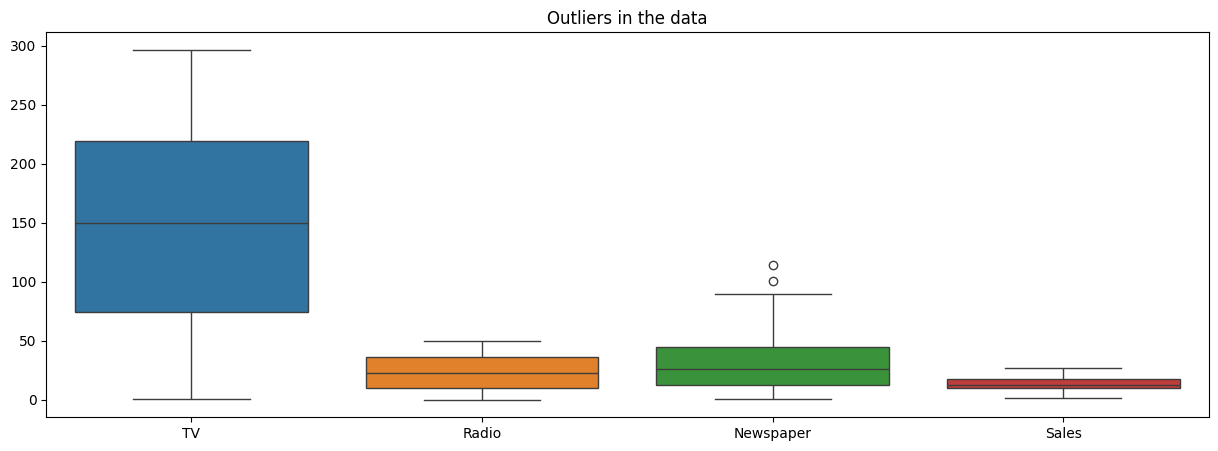

In [49]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.title("Outliers in the data")
plt.show()

In [51]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
data = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.describe())

               TV       Radio   Newspaper       Sales
count  198.000000  198.000000  198.000000  198.000000
mean   146.688384   23.130808   29.777273   13.980808
std     85.443221   14.862111   20.446303    5.196097
min      0.700000    0.000000    0.300000    1.600000
25%     74.800000    9.925000   12.650000   10.325000
50%    149.750000   22.400000   25.600000   12.900000
75%    218.475000   36.325000   44.050000   17.375000
max    293.600000   49.600000   89.400000   27.000000


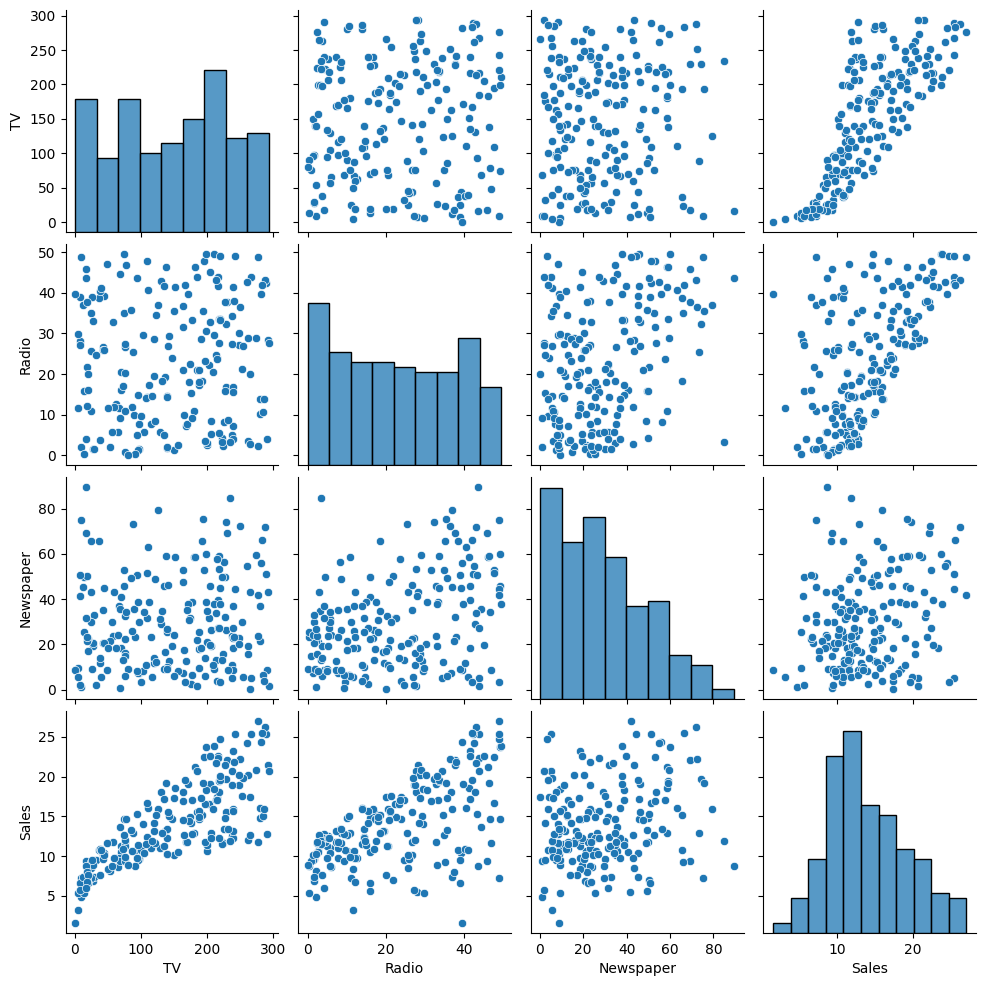

In [52]:
sns.pairplot(data)
plt.show()

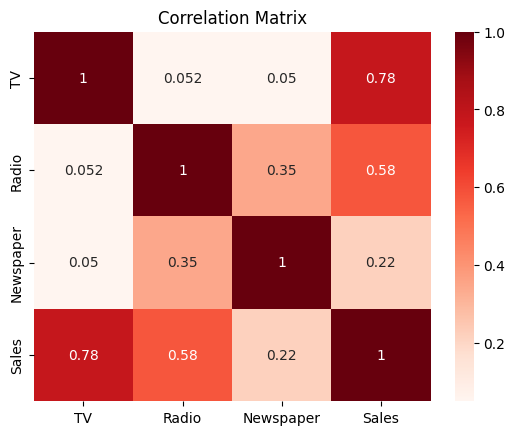

In [53]:
sns.heatmap(data.corr(), annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

## **split and standard**

In [37]:
X = df.drop(columns=['Sales'])
y = df['Sales']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)

X_train =  (160, 3)  y_train =  (160,)
X_test  =  (40, 3)  y_test  =  (40,)


## **LinearRegression**

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

0.8957008271017817
0.8994380241009119


In [20]:
print(regressor.score(X_test, y_test))

print(regressor.coef_,"DDDD",regressor.intercept_)

[3.76419618 2.79230665 0.05597551] DDDD 14.100000000000001


In [21]:
y_pred = regressor.predict(X_test)


## **DecisionTreeRegressor**

In [24]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=5)
DT.fit(X_train, y_train)
print(DT.score(X_train, y_train))
print(DT.score(X_test, y_test))

0.9851290275048047
0.9327908974862885


In [28]:
y_pred=DT.predict(X_test)


In [29]:
print('actual Output  : ',(y_test[:5].tolist()))
print('predict output : ',y_pred[:5].tolist())

actual Output  :  [16.9, 22.4, 21.4, 7.3, 24.7]
predict output :  [18.3, 20.5, 19.928571428571427, 6.9, 22.514285714285712]
